In [1]:
import wfdb
import numpy as np
import pywt
import matplotlib.pyplot as plt

In [2]:
record = wfdb.rdrecord('./data/nsrdb/16265')

In [4]:
record.record_name

'16265'

In [12]:
wfdb.rdheader(record.record_name, pn_dir="nsrdb", rd_segments=True)

In [13]:
wfdb.show_ann_classes()

     extension                        description  human_reviewed
atr        atr          Reference ECG annotations            True
blh        blh         Human reviewed beat labels            True
blm        blm                Machine beat labels           False
alh        alh              Human reviewed alarms            True
alm        alm                     Machine alarms           False
qrsc      qrsc      Human reviewed QRS detections            True
qrs        qrs             Machine QRS detections           False
bph        bph  Human reviewed BP beat detections            True
bpm        bpm         Machine BP beat detections           False


In [15]:
wfdb.show_ann_labels()

    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ventricular escape beat
11           11      j                 Nodal (junctional) escape beat
12           12      /                                     Paced beat
13           13     

In [21]:
ann = wfdb.rdann('./data/nsrdb/16265', 'atr')

In [22]:
ann

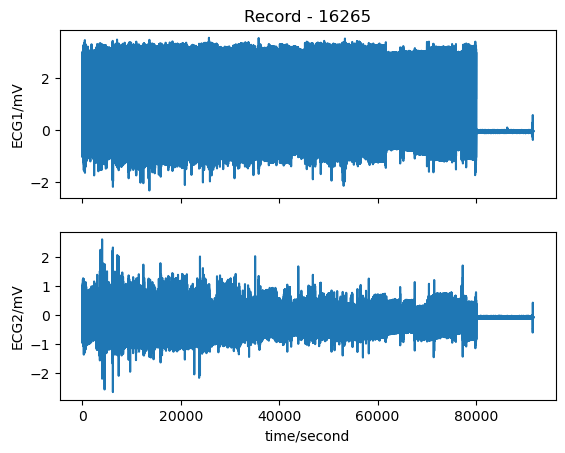

Press enter to continue... 


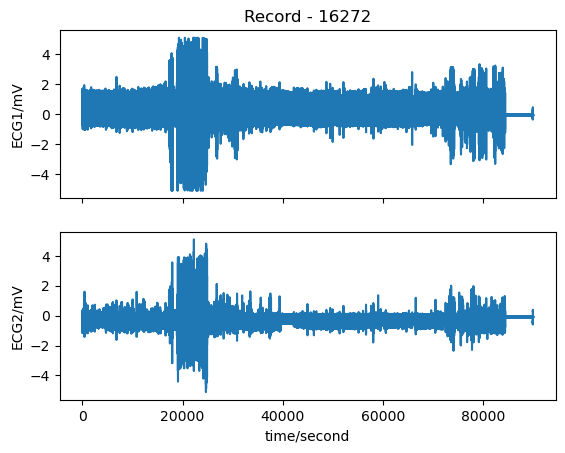

Press enter to continue... 


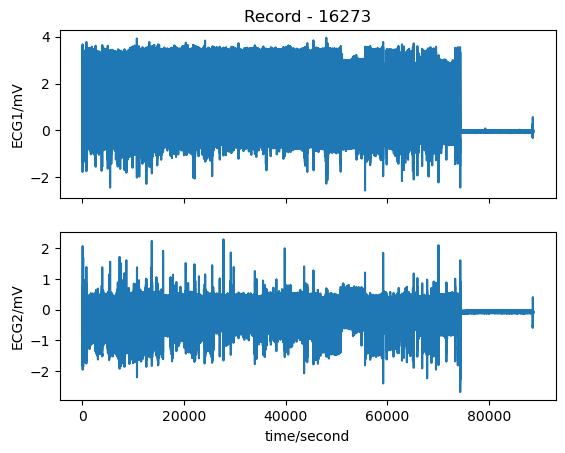

Press enter to continue... 


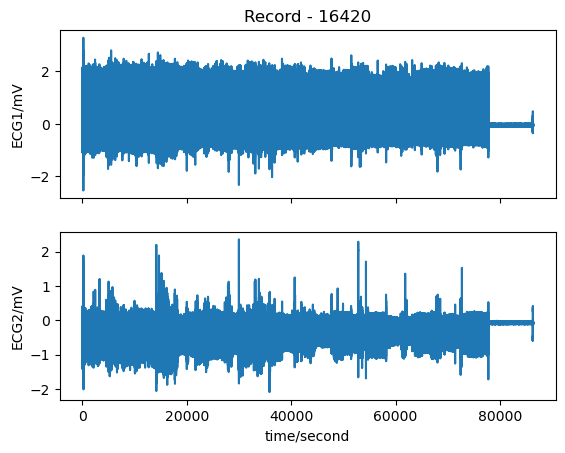

Press enter to continue... 


MemoryError: Unable to allocate 22.8 MiB for an array with shape (11960320,) and data type int16

In [20]:
wfdb.plot_all_records(directory='./data/nsrdb/
')

In [24]:
record.p_signal.shape

(11730944, 2)

In [25]:
record.p_signal

array([[-0.165, -0.325],
       [-0.155, -0.325],
       [-0.195, -0.305],
       ...,
       [-0.05 , -0.095],
       [-0.05 , -0.085],
       [-0.05 , -0.085]])

In [27]:
ann.sample.shape

(100955,)

In [28]:
ann.sample

array([       1,       52,      129, ..., 10247715, 10247823, 10247936])

In [29]:
wfdb.plot_items(signal=record.p_signal,
                    ann_samp=[ann.sample, ann.sample],
                    title='MIT-BIH Record NSR 16265', time_units='seconds',
                    figsize=(10,4), ecg_grids='all')

TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'

In [30]:
record_1 = wfdb.rdrecord('./data/nsrdb/16265', sampto=3000)
ann_1 = wfdb.rdann('./data/nsrdb/16265', 'atr', sampto=3000)

In [31]:
record_1.p_signal.shape

(3000, 2)

In [33]:
record_1.p_signal

array([[-0.165, -0.325],
       [-0.155, -0.325],
       [-0.195, -0.305],
       ...,
       [-0.135, -0.015],
       [-0.145, -0.015],
       [-0.125, -0.005]])

In [34]:
ann_1.sample.shape

(38,)

In [36]:
ann_1.sample

array([   1,   52,  129,  207,  284,  364,  442,  522,  598,  675,  754,
        833,  916,  996, 1075, 1155, 1238, 1321, 1403, 1483, 1564, 1644,
       1723, 1802, 1882, 1961, 2038, 2117, 2197, 2278, 2357, 2438, 2522,
       2606, 2691, 2774, 2856, 2941])

In [41]:
wfdb.plot_items(signal=record_1.p_signal,
                    ann_samp=[ann_1.sample, ann_1.sample],
                fs=128,
                    title='MIT-BIH Record NSR 16265', time_units='seconds',
                    figsize=(10,4), ecg_grids='all')

TypeError: 'NoneType' object is not subscriptable

In [38]:
record_1.fs

128

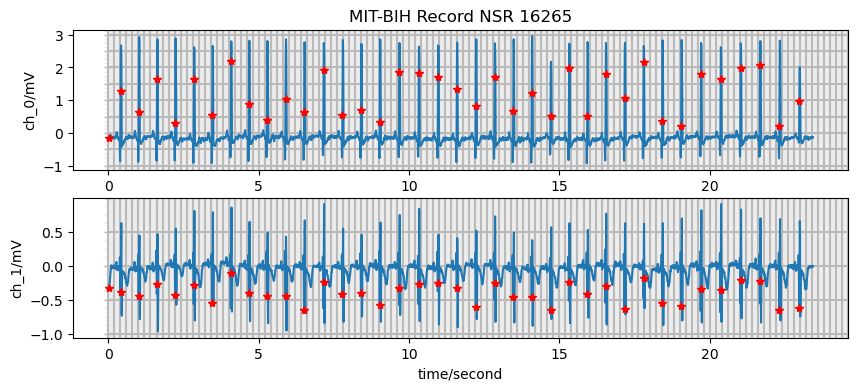

In [42]:
wfdb.plot_items(signal=record_1.p_signal,
                ann_samp=[ann_1.sample, ann_1.sample],
                fs=128,
                sig_units=['mV', 'mV'],  # Explicitly define signal units for both leads
                title='MIT-BIH Record NSR 16265',
                time_units='seconds',
                figsize=(10,4), ecg_grids='all')

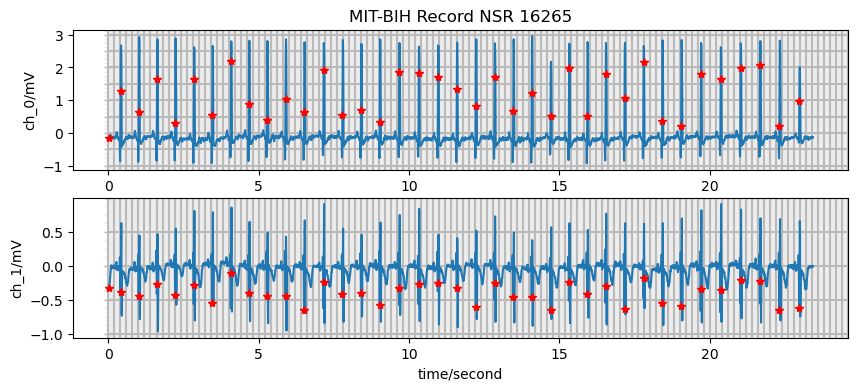

In [43]:
wfdb.plot_items(signal=record_1.p_signal,
                ann_samp=[ann_1.sample, ann_1.sample],
                fs=128,  # Explicitly passing fs
                sampling_freq=128,  # Adding this argument explicitly
                sig_units=['mV', 'mV'],
                title='MIT-BIH Record NSR 16265',
                time_units='seconds',
                figsize=(10,4), ecg_grids='all')


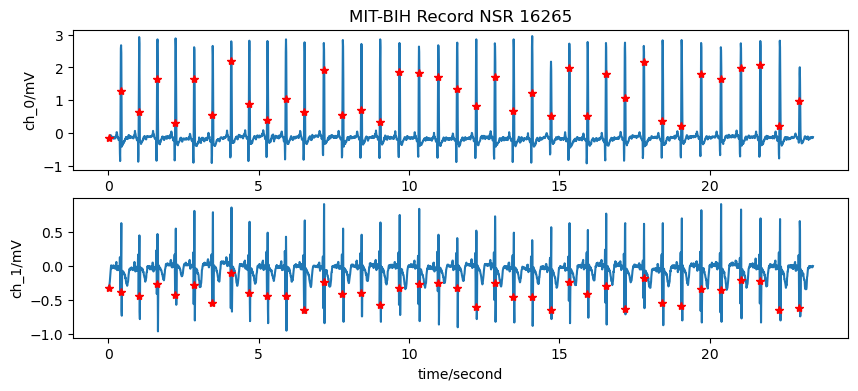

In [44]:
wfdb.plot_items(signal=record_1.p_signal,
                ann_samp=[ann_1.sample, ann_1.sample],
                fs=128,
                sig_units=['mV', 'mV'],
                title='MIT-BIH Record NSR 16265',
                time_units='seconds',
                figsize=(10,4), ecg_grids=None)  # Disable ECG grids


In [49]:
record_2 = wfdb.rdrecord('./data/nsrdb/16265', sampto=500)
ann_2 = wfdb.rdann('./data/nsrdb/16265', 'atr', sampto=500)

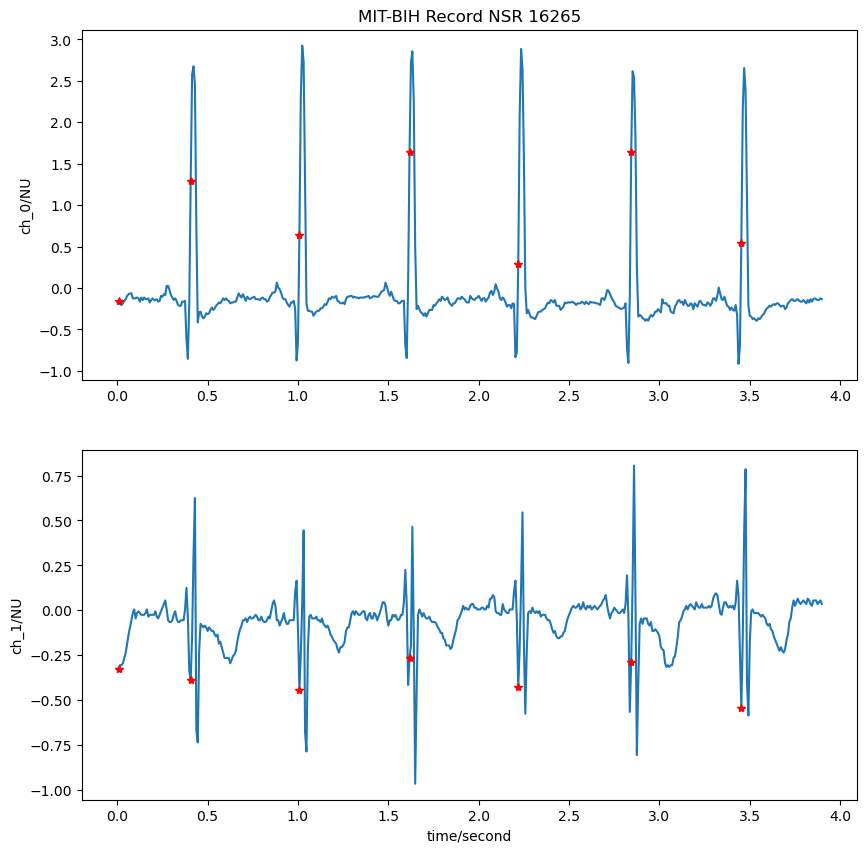

In [56]:
wfdb.plot_items(signal=record_2.p_signal,
                ann_samp=[ann_2.sample, ann_2.sample],
                fs=128,
                #sig_units=['mV', 'mV'],
                title='MIT-BIH Record NSR 16265',
                time_units='seconds',
                figsize=(10,10), ecg_grids=None)  # Disable ECG grids

In [61]:
wfdb.plot_wfdb(record=record_2, annotation=ann_2, plot_sym=True,
                   time_units='seconds', title='MIT-BIH Record',
                   figsize=(10,4), ecg_grids='all')

Exception: The length of the ylabel must be the same as the signal: 2 values

In [62]:
record_2.sig_name

['ECG1', 'ECG2']

In [63]:
wfdb.plot_wfdb(record=record_2, annotation=ann_2, plot_sym=True,
               time_units='seconds', title='MIT-BIH Record',
               figsize=(10,4), ecg_grids='all',
               ylabel=['Lead I', 'Lead II'])  # Ensure two labels

TypeError: plot_wfdb() got an unexpected keyword argument 'ylabel'

In [64]:
wfdb.plot_wfdb(record=record_2, annotation=ann_2, plot_sym=True,
               time_units='seconds', title='MIT-BIH Record',
               figsize=(10,4), ecg_grids='all',
               sig_name=['ECG1', 'ECG2'])  # Use actual signal names

TypeError: plot_wfdb() got an unexpected keyword argument 'sig_name'

In [65]:
record_2.sig_units

AttributeError: 'Record' object has no attribute 'sig_units'

In [66]:
record_2.__dict__

{'record_name': '16265',
 'n_sig': 2,
 'fs': 128,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 500,
 'base_time': datetime.time(8, 4),
 'base_date': None,
 'comments': ['32 M'],
 'sig_name': ['ECG1', 'ECG2'],
 'p_signal': array([[-0.165, -0.325],
        [-0.155, -0.325],
        [-0.195, -0.305],
        [-0.205, -0.305],
        [-0.185, -0.295],
        [-0.155, -0.265],
        [-0.135, -0.235],
        [-0.095, -0.185],
        [-0.075, -0.135],
        [-0.065, -0.095],
        [-0.065, -0.055],
        [-0.125, -0.015],
        [-0.125,  0.005],
        [-0.125, -0.045],
        [-0.115, -0.015],
        [-0.125, -0.005],
        [-0.165, -0.015],
        [-0.115, -0.025],
        [-0.145, -0.025],
        [-0.115, -0.025],
        [-0.135, -0.015],
        [-0.135,  0.005],
        [-0.125, -0.035],
        [-0.175, -0.025],
        [-0.145, -0.025],
        [-0.125, -0.025],
        [-0.145, -0.025],
        [-0.145, -0.005],
        [-0.135, -0.035],
        [-0.